# Covtype – (SAS Viya ML vs SciKit-Learn)
-------
This notebook highlights the performance of the SAS Viya ML Linear Support Vector Classification algorithm available on Workbench using scikit-learn as a comparison.  


In [1]:
#Import required libraries and packages
import time
import pandas as pd 
import numpy  as np
import seaborn as sns
from sasviya.ml.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

#### Data Preparation

In [2]:
dataset = 'covtype'
train = pd.read_csv(f'{dataset}_train.csv', header=None)
test  = pd.read_csv(f'{dataset}_test.csv',  header=None)
nObs, nCol = train.shape
nFtr = nCol - 1

scaler = StandardScaler()
features = list(range(nFtr))
X_train = scaler.fit_transform(train[features])
X_test  = scaler.transform(test[features])

target  = nFtr 
y_train = train[target]
y_test  = test[target]

In [3]:
#Explore data
train

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.631816,0.080556,0.257576,0.137437,0.280362,0.207672,0.830709,0.787402,0.472441,0.029555,...,0,0,0,0,0,0,0,0,0,-1
1,0.519760,0.530556,0.136364,0.322119,0.414729,0.312070,0.866142,0.972441,0.633858,0.088666,...,0,0,0,0,0,0,0,0,0,-1
2,0.402201,0.205556,0.060606,0.171797,0.244186,0.203597,0.885827,0.909449,0.559055,0.851527,...,0,0,0,0,0,0,0,0,0,1
3,0.449725,0.130556,0.272727,0.077309,0.255814,0.181678,0.877953,0.783465,0.409449,0.367210,...,0,0,0,0,0,0,0,0,0,1
4,0.622811,0.997222,0.227273,0.173228,0.304910,0.512997,0.775591,0.834646,0.594488,0.291231,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464805,0.422211,0.594444,0.257576,0.042949,0.224806,0.235633,0.795276,1.000000,0.720472,0.169803,...,0,0,0,0,0,0,0,0,0,1
464806,0.657329,0.416667,0.075758,0.042949,0.224806,0.451033,0.893701,0.944882,0.578740,0.458525,...,0,0,0,0,0,0,0,0,0,-1
464807,0.428714,0.219444,0.227273,0.021475,0.241602,0.197415,0.937008,0.834646,0.397638,0.319810,...,0,0,0,0,0,0,0,0,0,1
464808,0.682341,0.016667,0.227273,0.042949,0.246770,0.265561,0.791339,0.826772,0.570866,0.213300,...,0,0,0,0,0,0,0,0,0,-1


<Axes: >

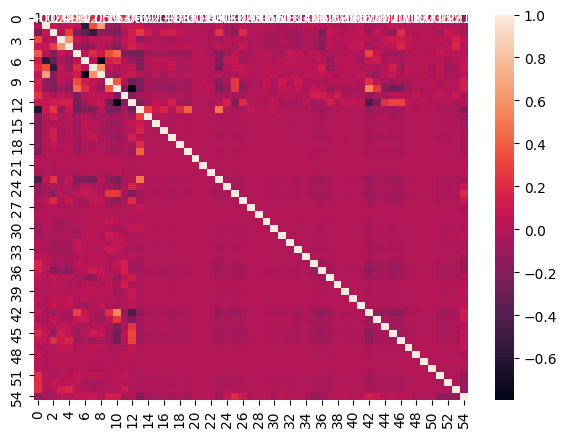

In [4]:
# Display heatmap
plt.figure(figsize=(7,5))
sns.heatmap(train.corr(), fmt='.2g', annot=True)

##  Model Training  

<body>Linear Support Vector Classification (Linear SVC) is a supervised machine learning algorithm used for binary classification tasks.</body>
<hr width="100%" size="2">


#### **SAS Viya** – Linear Support Vector Classification (Linear SVC)




In [5]:
def SASViyaML_Train():
    sas_model = SVC(kernel='linear', max_iter=1000, tol=0.0001, random_state=1)
    sas_model.fit(X_train, y_train)
    return (sas_model)
sas_model = SASViyaML_Train()
SASViyaML_Train_Time = %timeit -r 1 -o SASViyaML_Train()

11.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [6]:
def SASViyaML_Test():
    predictions = sas_model.predict(X_test)
    return (predictions)
predictions = SASViyaML_Test()
print("Accuracy Score :", round(accuracy_score(y_test, predictions)*100 ,2), "%")
SASViyaML_Test_Time = %timeit -r 1 -o SASViyaML_Test()

Accuracy Score : 76.32 %
274 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Text(0.5, 1.0, 'Accuracy Score for SAS Viya ML: 76.32')

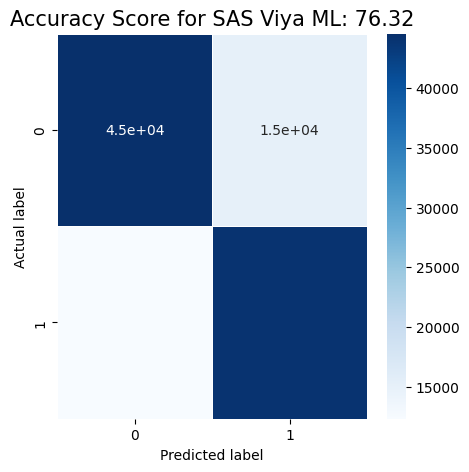

In [7]:
#Visual Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for SAS Viya ML: {0}'.format(round(accuracy_score(y_test, predictions)*100 ,2))
plt.title(all_sample_title, size = 15)

In [8]:
#Print Confusion Matrix
print("SAS WB Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("SAS WB Precision: ", precision_score(y_test, predictions, average=None))
print("SAS WB Recall:    ", recall_score(y_test, predictions, average=None))
print("SAS WB F1 score:  ", f1_score(y_test, predictions, average=None))
print("-------------------------------- ")

WB_Accu = round(accuracy_score(y_test, predictions)*100 ,2)
WB_Precision = precision_score(y_test, predictions, average=None)
WB_Recall = recall_score(y_test, predictions, average=None)
WB_F1 = f1_score(y_test, predictions, average=None)

print("\nSAS WB Classification Report:\n",classification_report(y_test, predictions))

SAS WB Confusion Matrix:
[[44536 15171]
 [12343 44152]]
SAS WB Precision:  [0.78299548 0.74426445]
SAS WB Recall:     [0.74590919 0.78152049]
SAS WB F1 score:   [0.76400254 0.76243762]
-------------------------------- 

SAS WB Classification Report:
               precision    recall  f1-score   support

          -1       0.78      0.75      0.76     59707
           1       0.74      0.78      0.76     56495

    accuracy                           0.76    116202
   macro avg       0.76      0.76      0.76    116202
weighted avg       0.76      0.76      0.76    116202



<br><br>

#### **SciKit-Learn** – Linear Support Vector Classification (Linear SVC)

In [9]:
def SKLearn_Train():
    skl_model = LinearSVC(max_iter=1000, tol=0.0001, random_state=1)
    skl_model.fit(X_train, y_train)
    return (skl_model)
skl_model = SKLearn_Train()
SKLearn_Train_Time = %timeit -r 1 -o SKLearn_Train()

12.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
def SKLearn_Test():
    predictions = skl_model.predict(X_test)
    return (predictions)
predictions = SKLearn_Test()
print("Accuracy Score :", round(accuracy_score(y_test, predictions)*100 ,2), "%")

SKLearn_Test_Time = %timeit -r 1 -o SKLearn_Test()

Accuracy Score : 75.64 %
50.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


Text(0.5, 1.0, 'Accuracy Score for SciKit-Learn: 75.64')

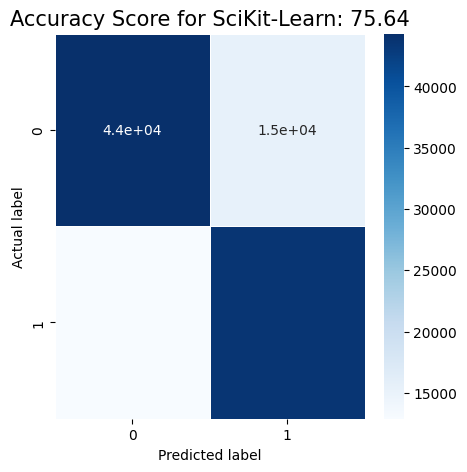

In [11]:
#Visual Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for SciKit-Learn: {0}'.format(round(accuracy_score(y_test, predictions)*100 ,2))
plt.title(all_sample_title, size = 15)

In [12]:
#Print Confusion Matrix
print("Sklearn Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Sklearn Precision: ", precision_score(y_test, predictions, average=None))
print("Sklearn Recall:    ", recall_score(y_test, predictions, average=None))
print("Sklearn F1 score:  ", f1_score(y_test, predictions, average=None))
print("------------------------------------------ ")

SKLearn_Accu = round(accuracy_score(y_test, predictions)*100 ,2)
SKLearn_Precision = precision_score(y_test, predictions, average=None)
SKLearn_Recall = recall_score(y_test, predictions, average=None)
SKLearn_F1 = f1_score(y_test, predictions, average=None)

print("\nSklearn Classification Report:\n",classification_report(y_test, predictions))

Sklearn Confusion Matrix:
[[44296 15411]
 [12895 43600]]
Sklearn Precision:  [0.77452746 0.7388453 ]
Sklearn Recall:     [0.74188956 0.77174971]
Sklearn F1 score:   [0.75785728 0.75493914]
------------------------------------------ 

Sklearn Classification Report:
               precision    recall  f1-score   support

          -1       0.77      0.74      0.76     59707
           1       0.74      0.77      0.75     56495

    accuracy                           0.76    116202
   macro avg       0.76      0.76      0.76    116202
weighted avg       0.76      0.76      0.76    116202



In [13]:
#Model Comparison
model_comparison = pd.DataFrame(
    {'Accuracy ':[WB_Accu, SKLearn_Accu],
    'F1 Score': [((WB_F1[1]* 100).astype(str) + " %"), ((SKLearn_F1[1]* 100).astype(str) + " %")],
    'Train Time (s)': [SASViyaML_Train_Time, SKLearn_Train_Time]},
    ["SAS Viya ML ", "Scikit-Learn "]
)

model_comparison

,Accuracy,F1 Score,Train Time (s)
SAS Viya ML,76.32,76.2437617641472 %,11.8 s ± 0 ns per loop (mean ± std. dev. of 1 ...
Scikit-Learn,75.64,75.49391373608297 %,12.6 s ± 0 ns per loop (mean ± std. dev. of 1 ...
